In [143]:
import numpy as np
from scipy.linalg import diagsvd
import matplotlib.pyplot as plt

# QR Factorization

In [86]:
def qr_factorization_gram_schmidt(A):
    Q = np.zeros(shape=(A.shape[0], A.shape[0]))
    R = np.zeros(shape=(A.shape[0], A.shape[0]))
    # Q
    for k in range(A.shape[0]):
        Q[:,k] = A[:,k]
        for i in range(k):
            Q[:,k] -= np.dot(Q[:,i], A[:,k]) * Q[:,i]
        Q[:,k] = Q[:,k] / np.linalg.norm(Q[:,k])

    # R
    for i in range(A.shape[0]):
        for j in range(i, A.shape[0]):
            R[i,j] = np.dot(Q[:,i], A[:,j])

    return Q, R

In [42]:
def random_matrix(n):
    return np.random.rand(n, n)

In [96]:
for n in range(50, 501, 50):
    M = random_matrix(n)
    Q, R = qr_factorization_gram_schmidt(M)
    Q_lib, R_lib = np.linalg.qr(M)
    print(f"n={n:3}, "
          f"Q@R==A: {np.allclose(Q@R, M)}, "
          f"allclose Q: {np.allclose(np.abs(Q), np.abs(Q_lib))}, "
          f"allclose R: {np.allclose(np.abs(R), np.abs(R_lib))}")

n= 50, Q@R==A: True, allclose Q: True, allclose R: True
n=100, Q@R==A: True, allclose Q: True, allclose R: True
n=150, Q@R==A: True, allclose Q: True, allclose R: True
n=200, Q@R==A: True, allclose Q: True, allclose R: True
n=250, Q@R==A: True, allclose Q: True, allclose R: True
n=300, Q@R==A: True, allclose Q: True, allclose R: True
n=350, Q@R==A: True, allclose Q: True, allclose R: True
n=400, Q@R==A: True, allclose Q: True, allclose R: True
n=450, Q@R==A: True, allclose Q: True, allclose R: True
n=500, Q@R==A: True, allclose Q: True, allclose R: True


# Bad conditioned matrices

In [139]:
def bad_conditioned_matrix(n, step):
    M = random_matrix(n)
    S, V, D = np.linalg.svd(M)
    V[0] *= step
    return S @ np.diag(V) @ D

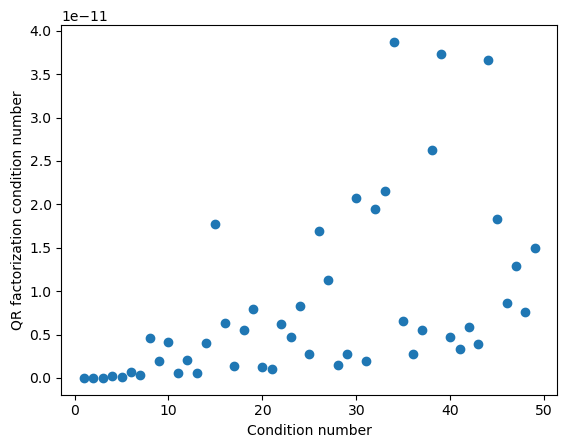

In [150]:
result = []
for cond in range(1, 50):
    M = bad_conditioned_matrix(8, cond)
    Q, R = qr_factorization_gram_schmidt(M)
    result.append(np.max(np.abs(np.identity(Q.shape[0])-Q.T@Q)))

plt.scatter(range(1, 50), result)
plt.xlabel("Condition number")
plt.ylabel("QR factorization condition number")
plt.show()

# Solve system of equations using QR factorization.

$$
\begin{aligned}
f(x) = a_0 + a_1 x + a_2 x^2
\end{aligned}
$$

In [82]:
X = np.arange(-5, 6, 1)
Y = np.array([2, 7, 9, 12, 13, 14, 14, 13, 10, 8, 4])
A = np.array([[1, x, x**2] for x in X])

In [88]:
def qr_solve_least_square(A, Y):
    Q, R = qr_factorization_gram_schmidt(A.T @ A)
    return np.linalg.solve(R, Q.T @ A.T @ Y)

result = qr_solve_least_square(A, Y)
print(f'f(x) = {result[0]} + {result[1]}x + {result[2]}x^2')

f(x) = 13.972027972028217 + 0.18181818181818182x + -0.4335664335664472x^2


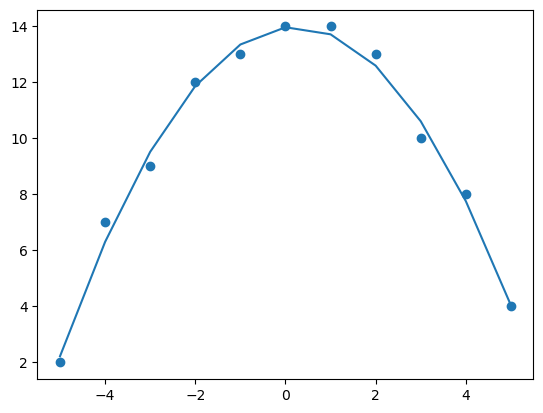

In [90]:
def plot(A, X, Y):
    plt.scatter(X, Y)
    plt.plot(X, A @ result)
    plt.show()
plot(A, X, Y)

---